> **1\. DATASET PREPARATION**

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import pyodbc
%matplotlib inline

plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['font.size'] = 14
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16


In [2]:
#Method 1: restore AdvantureWorksDW2019.bak file, run sqlview.sql file
"""
cnxn = pyodbc.connect("Driver={SQL Server};"
            "Server=LAPTOP-EPADQ5CQ;"
            "Database=AdventureWorksDW2019;"
            "Trusted_Connection=yes;"
        )
"""

'\ncnxn = pyodbc.connect("Driver={SQL Server};"\n            "Server=LAPTOP-EPADQ5CQ;"\n            "Database=AdventureWorksDW2019;"\n            "Trusted_Connection=yes;"\n        )\n'

In [3]:
#data = pd.read_sql_query('SELECT * FROM AdventureWorksDW2019..vSales', cnxn)

In [4]:
#Method 2: 
data = pd.read_csv('vSales.csv')


In [5]:
data.head()

,OrderDateKey,CalendarYear,EnglishMonthName,OrderDate,SalesOrderNumber,EnglishPromotionType,EnglishProductSubcategoryName,EnglishProductCategoryName,CustomerKey,BirthDate,Gender,YearlyIncome,SalesTerritoryGroup,DiscountAmount,SalesAmount
0,20101229,2010,December,2010-12-29,SO43700,No Discount,Road Bikes,Bikes,14501,1943-11-10,M,80000.0,North America,0.0,699.0982
1,20101229,2010,December,2010-12-29,SO43701,No Discount,Mountain Bikes,Bikes,11003,1973-08-14,F,70000.0,Pacific,0.0,3399.9900
2,20101230,2010,December,2010-12-30,SO43702,No Discount,Road Bikes,Bikes,27645,1972-08-14,M,120000.0,North America,0.0,3578.2700
3,20110101,2011,January,2011-01-01,SO43712,No Discount,Road Bikes,Bikes,13513,1947-03-08,F,30000.0,Europe,0.0,3578.2700
4,20110102,2011,January,2011-01-02,SO43717,No Discount,Road Bikes,Bikes,25249,1963-02-05,F,70000.0,Pacific,0.0,699.0982


**2\. DATA CLEANING**

In [6]:
data.duplicated().value_counts()

False    58247
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58247 entries, 0 to 58246
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   OrderDateKey                   58247 non-null  int64  
 1   CalendarYear                   58247 non-null  int64  
 2   EnglishMonthName               58247 non-null  object 
 3   OrderDate                      58247 non-null  object 
 4   SalesOrderNumber               58247 non-null  object 
 5   EnglishPromotionType           58247 non-null  object 
 6   EnglishProductSubcategoryName  58247 non-null  object 
 7   EnglishProductCategoryName     58247 non-null  object 
 8   CustomerKey                    58247 non-null  int64  
 9   BirthDate                      58247 non-null  object 
 10  Gender                         58247 non-null  object 
 11  YearlyIncome                   58247 non-null  float64
 12  SalesTerritoryGroup            58247 non-null 

In [8]:
data.isnull().sum()

OrderDateKey                     0
CalendarYear                     0
EnglishMonthName                 0
OrderDate                        0
SalesOrderNumber                 0
EnglishPromotionType             0
EnglishProductSubcategoryName    0
EnglishProductCategoryName       0
CustomerKey                      0
BirthDate                        0
Gender                           0
YearlyIncome                     0
SalesTerritoryGroup              0
DiscountAmount                   0
SalesAmount                      0
dtype: int64

In [9]:
data['BirthDate'] = pd.to_datetime(data['BirthDate'], format = '%Y-%m-%d')
data['OrderDate'] = pd.to_datetime(data['OrderDate'], format = '%Y-%m-%d')

**3\. DATA EXPLORATION**

In [10]:
data.describe()

,OrderDateKey,CalendarYear,CustomerKey,YearlyIncome,DiscountAmount,SalesAmount
count,5.824700e+04,58247.000000,58247.000000,58247.000000,58247.0,58247.000000
mean,2.012976e+07,2012.905128,18843.811304,59696.636737,0.0,468.824267
std,4.772096e+03,0.480534,5430.497392,33054.334234,0.0,919.211592
min,2.010123e+07,2010.000000,11000.000000,10000.000000,0.0,2.290000
25%,2.013040e+07,2013.000000,14003.000000,30000.000000,0.0,8.990000
50%,2.013072e+07,2013.000000,18165.000000,60000.000000,0.0,29.990000
75%,2.013102e+07,2013.000000,23425.000000,80000.000000,0.0,120.000000
max,2.014013e+07,2014.000000,29483.000000,170000.000000,0.0,3578.270000


A. Data collection period:

In [11]:
print("Data from %s to %s" %(data['OrderDate'].min(), data['OrderDate'].max()))

Data from 2010-12-29 00:00:00 to 2014-01-28 00:00:00


In [12]:
#applying grid to all our plots for better visuals
sns.set(style="whitegrid")

B. Products number per orders:

In [13]:
df_items_count = data.groupby('SalesOrderNumber').agg(
    Count = ('SalesOrderNumber','count')   
).reset_index()
df_items_count

,SalesOrderNumber,Count
0,SO43697,1
1,SO43698,1
2,SO43699,1
3,SO43700,1
4,SO43701,1
...,...,...
27114,SO75119,3
27115,SO75120,3
27116,SO75121,3
27117,SO75122,2


In [14]:
df_items_count = pd.DataFrame(data = df_items_count['Count'].value_counts()).reset_index()
df_items_count.columns = ['ProductNum', 'Frequency']
df_items_count

,ProductNum,Frequency
0,1,9856
1,2,7985
2,3,5581
3,4,2938
4,5,644
5,6,102
6,7,10
7,8,3


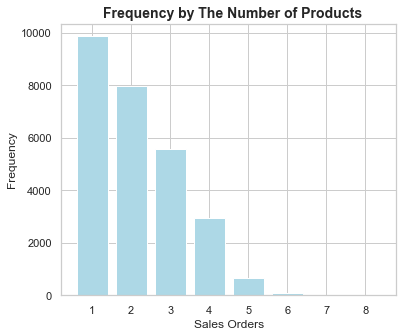

In [15]:
fig, ax = plt.subplots(figsize = (6, 5)) 
ax.bar(df_items_count['ProductNum'], df_items_count['Frequency'], color ='lightblue', width = 0.8)
plt.xlabel('Sales Orders', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency by The Number of Products' ,fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)

plt.show()


C. Category:

In [16]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
df_category_revenue = data.groupby('EnglishProductCategoryName').agg(
    Sales = ('SalesAmount', 'sum')
    ).reset_index()
df_category_revenue = df_category_revenue.rename(columns = {'EnglishProductCategoryName':'Category'})   
df_category_revenue

,Category,Sales
0,Accessories,698829
1,Bikes,26275340
2,Clothing,333438


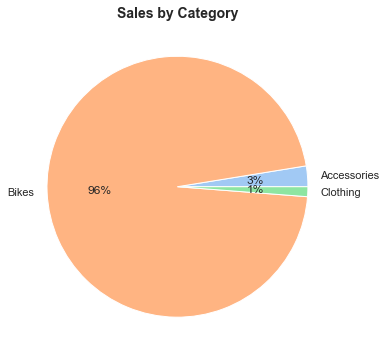

In [17]:
plt.figure(figsize=(6, 6))
values = df_category_revenue['Sales']
keys = df_category_revenue['Category']
palette_color = sns.color_palette('pastel')
plt.pie(values, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title('Sales by Category' ,fontweight='bold', size=14)

plt.show() 

D. Continent:

In [18]:
territory_count = data.groupby('SalesTerritoryGroup').agg(
    {

        'SalesOrderNumber': 'count'
    }
)
territory_count = territory_count.reset_index(level=['SalesTerritoryGroup'])
territory_count.columns = ['Continent',	'Count']
territory_count

,Continent,Count
0,Europe,17423
1,North America,27985
2,Pacific,12839


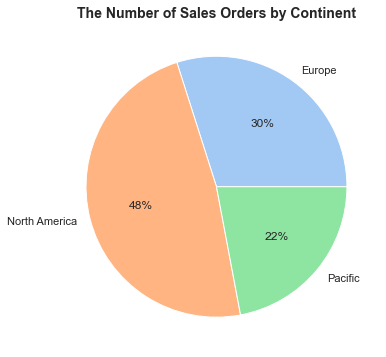

In [19]:
fig, ax = plt.subplots(figsize=(12, 6))
values = territory_count['Count']
keys = territory_count['Continent']
palette_color = sns.color_palette('pastel')
ax.pie(values, labels=keys, colors=palette_color, autopct='%.0f%%')
ax.set_title('The Number of Sales Orders by Continent' ,fontweight='bold', size=14)

plt.show() 

In [20]:
df_continent_revenue = data.groupby(['SalesTerritoryGroup']).agg(
    {

        'SalesAmount': 'sum'
    }
)
df_continent_revenue

df_continent_revenue = df_continent_revenue.reset_index(level=['SalesTerritoryGroup'])
df_continent_revenue.columns = ['Continent','Revenue']
df_continent_revenue

,Continent,Revenue
0,Europe,8237723
1,North America,10618041
2,Pacific,8451843


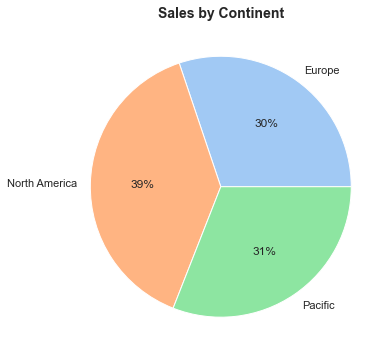

In [21]:

fig, ax = plt.subplots(figsize=(12, 6))
values = df_continent_revenue['Revenue']
keys = df_continent_revenue['Continent']
palette_color = sns.color_palette('pastel')
ax.pie(values, labels=keys, colors=palette_color, autopct='%.0f%%')
ax.set_title('Sales by Continent' ,fontweight='bold', size=14)

plt.show() 


E. Coupon:

In [22]:
data['DiscountAmount'].loc[data['DiscountAmount'] > 0]


Series([], Name: DiscountAmount, dtype: float64)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58247 entries, 0 to 58246
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   OrderDateKey                   58247 non-null  int64         
 1   CalendarYear                   58247 non-null  int64         
 2   EnglishMonthName               58247 non-null  object        
 3   OrderDate                      58247 non-null  datetime64[ns]
 4   SalesOrderNumber               58247 non-null  object        
 5   EnglishPromotionType           58247 non-null  object        
 6   EnglishProductSubcategoryName  58247 non-null  object        
 7   EnglishProductCategoryName     58247 non-null  object        
 8   CustomerKey                    58247 non-null  int64         
 9   BirthDate                      58247 non-null  datetime64[ns]
 10  Gender                         58247 non-null  object        
 11  YearlyIncome   

No customers used coupons for their orders

F. Customer feature table:

In [24]:
#Create table including many features about our customers

from datetime import datetime, date
maxdate = max(data['OrderDate'])
def age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
data['Age'] = data['BirthDate'].apply(lambda x: age(x))

df_customer_feature = data.groupby('CustomerKey').agg({
        'Age': 'max',
        'Gender': 'max',
        'YearlyIncome': 'max',
        'SalesTerritoryGroup': 'max',
        'OrderDate': lambda x: (maxdate - x.max()).days,
        'SalesOrderNumber': 'count',
        'SalesAmount': 'sum'
    }
)
df_customer_feature.columns = ['Age', 'Gender', 'YearlyIncome', 'Continent', 'Recency', 'Frequency', 'Monetary']
df_customer_feature = df_customer_feature.reset_index(level=['CustomerKey'])
df_customer_feature.head()

,CustomerKey,Age,Gender,YearlyIncome,Continent,Recency,Frequency,Monetary
0,11000,51,M,90000,Pacific,270,7,5929
1,11001,46,M,60000,Pacific,49,11,6384
2,11002,51,M,60000,Pacific,339,4,8114
3,11003,49,F,70000,Pacific,263,9,8139
4,11004,43,F,80000,Pacific,272,6,8196


In [25]:
df_customer_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18405 entries, 0 to 18404
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CustomerKey   18405 non-null  int64  
 1   Age           18405 non-null  int64  
 2   Gender        18405 non-null  object 
 3   YearlyIncome  18405 non-null  float64
 4   Continent     18405 non-null  object 
 5   Recency       18405 non-null  int64  
 6   Frequency     18405 non-null  int64  
 7   Monetary      18405 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 1.1+ MB


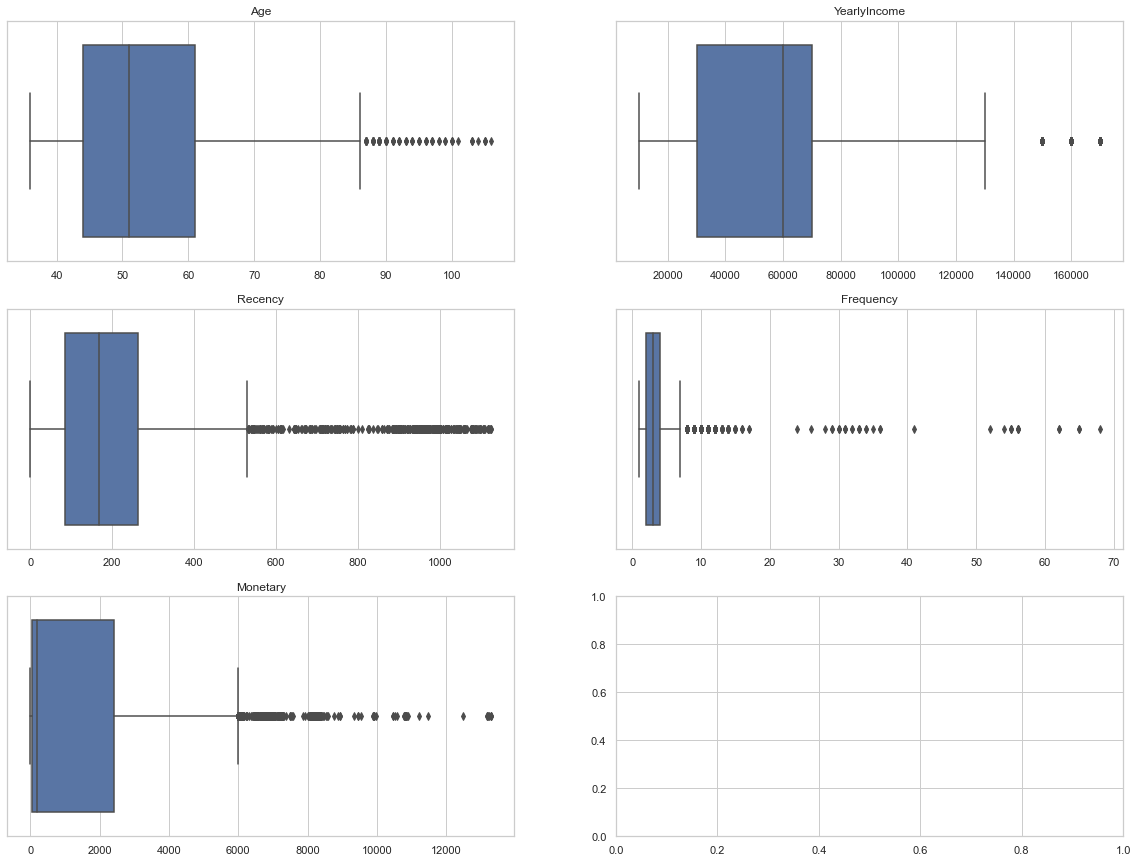

[Text(0.5, 1.0, 'Monetary'), Text(0.5, 0, '')]

In [26]:
# draw boxplot chart
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,15))
sns.boxplot( ax=axes[0][0], data = df_customer_feature, x = 'Age').set(title = "Age", xlabel = "")
sns.boxplot( ax=axes[0][1], data = df_customer_feature, x = 'YearlyIncome').set(title = "YearlyIncome", xlabel = "")
sns.boxplot( ax=axes[1][0], data = df_customer_feature, x = 'Recency').set(title = "Recency", xlabel = "")
sns.boxplot( ax=axes[1][1], data = df_customer_feature, x = 'Frequency').set(title = "Frequency", xlabel = "")
sns.boxplot( ax=axes[2][0], data = df_customer_feature, x = 'Monetary').set(title = "Monetary", xlabel = "")

G. Age:

In [27]:
df_customer_age = df_customer_feature.groupby('Age').agg(
    CusNum = ('CustomerKey', 'nunique')
).reset_index()
df_customer_age.sort_values('Age', ascending=True, inplace=True, ignore_index=True)
df_customer_age

,Age,CusNum
0,36,243
1,37,432
2,38,560
3,39,640
4,40,601
...,...,...
65,101,1
66,103,3
67,104,1
68,105,3


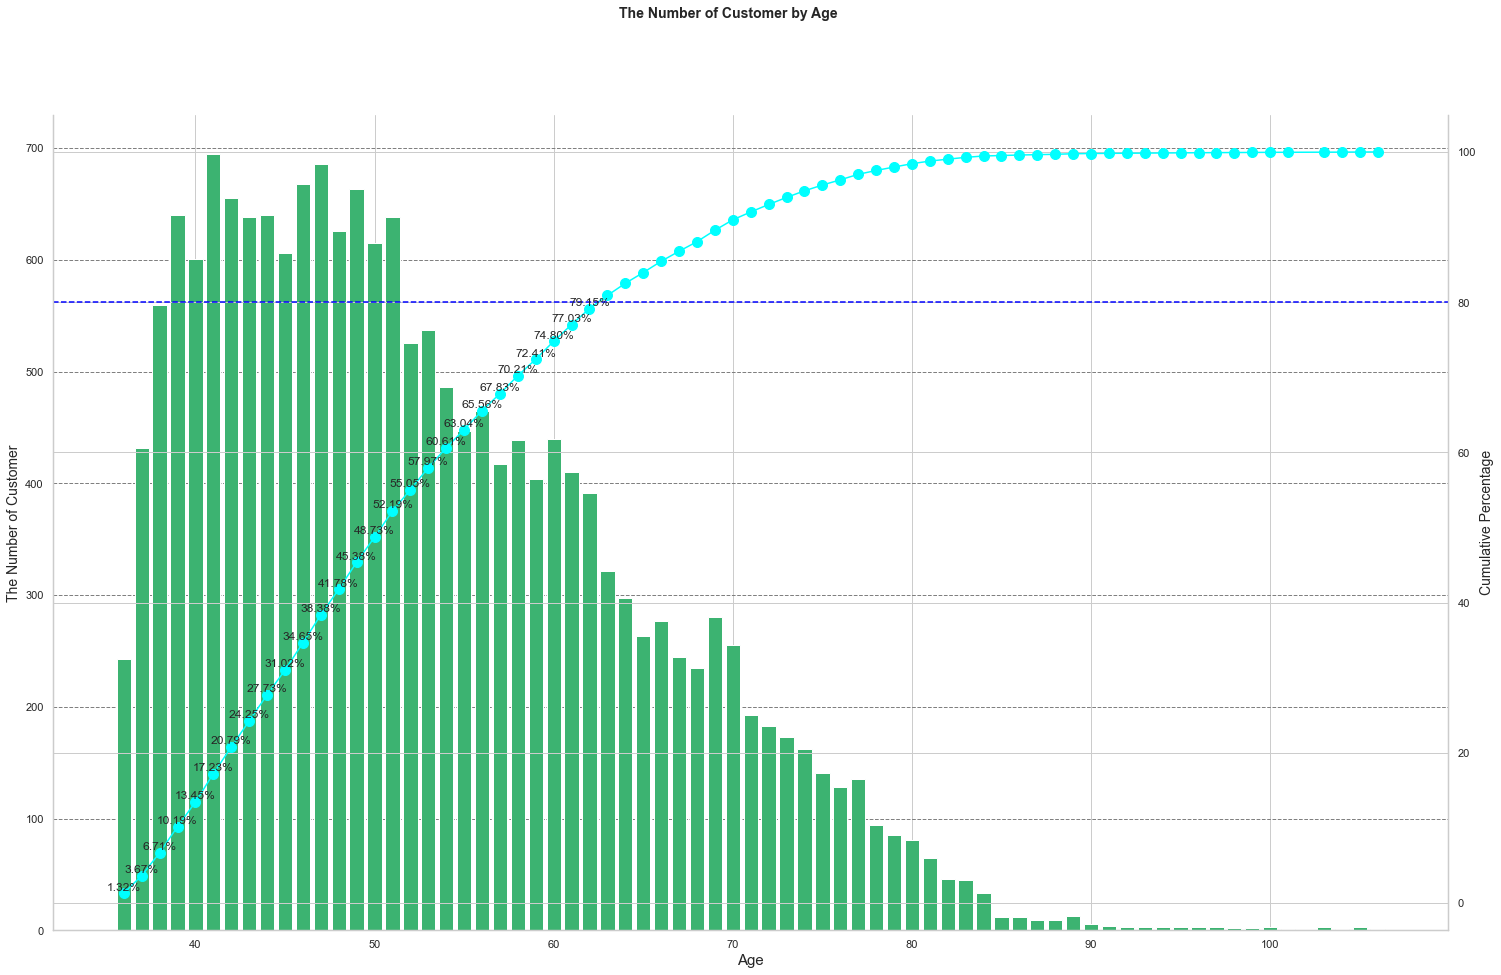

In [28]:

df_customer_age['Percentage'] = df_customer_age['CusNum']/df_customer_age['CusNum'].sum()*100
df_customer_age['Cummulate']  = df_customer_age['Percentage'].cumsum()
# Set figure and axis
fig, ax1 = plt.subplots(figsize=(25,15))
xs = df_customer_age['Age']
ys = df_customer_age['CusNum']
yl = df_customer_age['Cummulate']

# Plot bars
ax1.bar(xs, ys, color = '#3cb371')
"""
for x,y in zip(xs,ys):

        label = "{:.2f}".format(y)

        ax1.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,10), # distance from text to points (x,y)
                    ha='center') # horizontal alignment can be left, right or center
"""
#ax1.set_title("The number of borrowers by State", fontsize = 25, color = 'blue')
ax1.set_xlabel("Age", fontsize = 15)
ax1.set_ylabel("The Number of Customer", fontsize = 14)

# Second y axis (i.e. cumulative percentage)
ax2 = ax1.twinx()
ax2.plot(xs,yl, color="#00ffff", marker="o", ms=10)

ax2.axhline(80, color="blue", linestyle="--") # Tạo đường 80%

#annotate for line
for x,y in zip(xs,yl):
    if y > 80:
        break
    else:
        label = "{:.2f}".format(y) + '%'

        ax2.annotate(label, # this is the text
                    (x,y), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(0,3), # distance from text to points (x,y)
                    ha='center') # horizontal alignment can be left, right or center
        
ax1.yaxis.grid(color='gray', linestyle='dashed')
ax1.tick_params(left=False, bottom=False)
ax2.tick_params(right=False, bottom=False) 

ax2.set_ylabel("Cumulative Percentage", fontsize = 14)

ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False) 
plt.suptitle('The Number of Customer by Age', fontweight='bold', size=14)

plt.show()

Overally, approximately 80 percent of customers are between 35 and 62 year old.

J. Gender:

In [29]:
df_gender = df_customer_feature.groupby('Gender').agg(
    CusNum = ('CustomerKey', 'nunique')
).reset_index()
df_gender

,Gender,CusNum
0,F,9091
1,M,9314


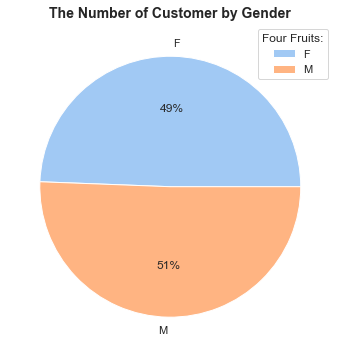

In [30]:
fig, ax = plt.subplots(figsize = (6, 6)) 
data = df_gender['CusNum'].tolist()
keys = df_gender['Gender'].tolist()
palette_color = sns.color_palette('pastel')
ax.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
ax.set_title('The Number of Customer by Gender' ,fontweight='bold', size=14)
plt.legend(title = "Four Fruits:")

plt.show()

The number of male customers is roughly same with that of females.

M. Recency:

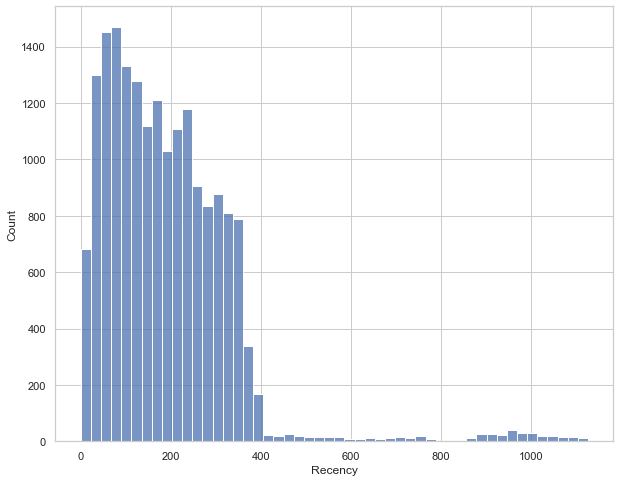

In [31]:
_= sns.histplot(x = 'Recency', data = df_customer_feature, bins = 50)

N. Frequency:

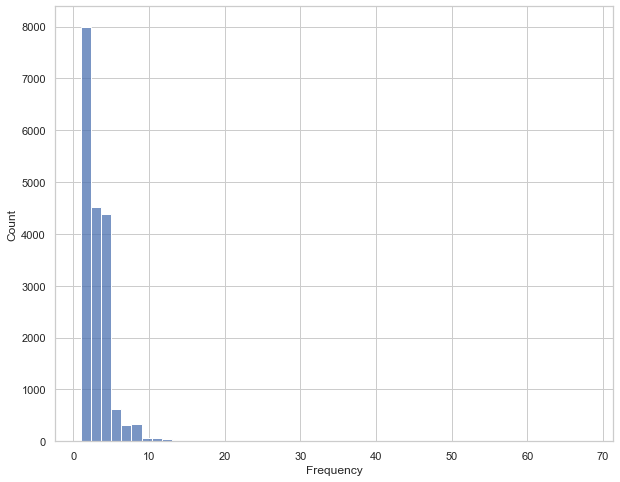

In [32]:
 _= sns.histplot(x = 'Frequency', data = df_customer_feature, bins = 50)


O. Monetary:

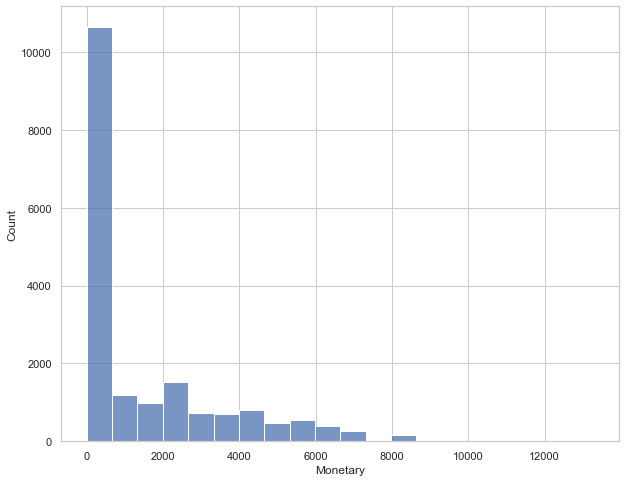

In [33]:
_= sns.histplot(x = 'Monetary', data = df_customer_feature, bins = 20)


P. Yearly Income:

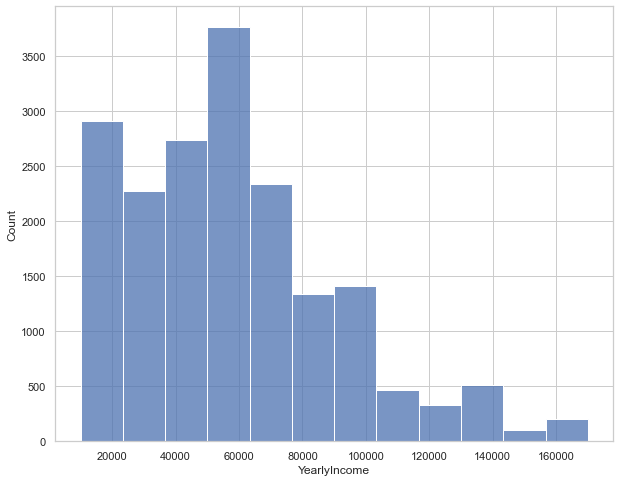

In [34]:
_= sns.histplot(x = 'YearlyIncome', data = df_customer_feature, bins = 12)

In [35]:
bins = np.linspace(min(df_customer_feature['YearlyIncome']), max(df_customer_feature['YearlyIncome']), 4)
bins


array([ 10000.        ,  63333.33333333, 116666.66666667, 170000.        ])

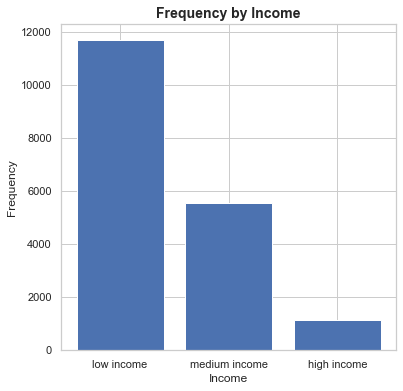

In [36]:
fig, ax = plt.subplots(figsize = (6, 6)) 
bin_names = ['low income', 'medium income','high income']
df_customer_feature['YearlyIncome_binned'] = pd.cut(df_customer_feature['YearlyIncome'], bins, labels = bin_names, include_lowest=True)
ax.bar(bin_names, df_customer_feature['YearlyIncome_binned'].value_counts())
ax.set_xlabel('Income', size=12)
ax.set_ylabel('Frequency', size=12)
plt.title('Frequency by Income' ,fontweight='bold', size=14)

plt.show()


Binning Yearly Income into high income, medium income, low income

<span style="color: rgba(0, 0, 0, 0.87); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;; background-color: rgb(255, 255, 255);">Q. Labeling Categories with Dummy variables:</span>

In [37]:
arr = ['YearlyIncome_binned']
for i in range(len(arr)):
  dummy_variable_1 = pd.get_dummies(df_customer_feature[arr[i]])
  df_customer_feature = pd.concat([df_customer_feature, dummy_variable_1], axis = 1)



In [38]:
df_customer_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18405 entries, 0 to 18404
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   CustomerKey          18405 non-null  int64   
 1   Age                  18405 non-null  int64   
 2   Gender               18405 non-null  object  
 3   YearlyIncome         18405 non-null  float64 
 4   Continent            18405 non-null  object  
 5   Recency              18405 non-null  int64   
 6   Frequency            18405 non-null  int64   
 7   Monetary             18405 non-null  float64 
 8   YearlyIncome_binned  18405 non-null  category
 9   low income           18405 non-null  uint8   
 10  medium income        18405 non-null  uint8   
 11  high income          18405 non-null  uint8   
dtypes: category(1), float64(2), int64(4), object(2), uint8(3)
memory usage: 1.2+ MB


**2\. K-Means Modelling:**

A. North Ameria:

a. Skewness:

In [39]:
df_customer_feature['Continent'].value_counts()

North America    9332
Europe           5486
Pacific          3587
Name: Continent, dtype: int64

In [40]:
df_customer_feature_NA = df_customer_feature.loc[df_customer_feature['Continent'] == 'North America']
df_customer_model_NA = df_customer_feature_NA[['Recency', 'Frequency', 'Monetary', 'low income', 'medium income', 'high income']].reset_index(drop = True)
df_customer_model_NA.head()

,Recency,Frequency,Monetary,low income,medium income,high income
0,105,5,81,0,1,0
1,7,5,114,0,1,0
2,273,6,138,0,1,0
3,375,2,181,1,0,0
4,353,3,2332,1,0,0


C:\Users\MINH THUAN\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


C:\Users\MINH THUAN\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


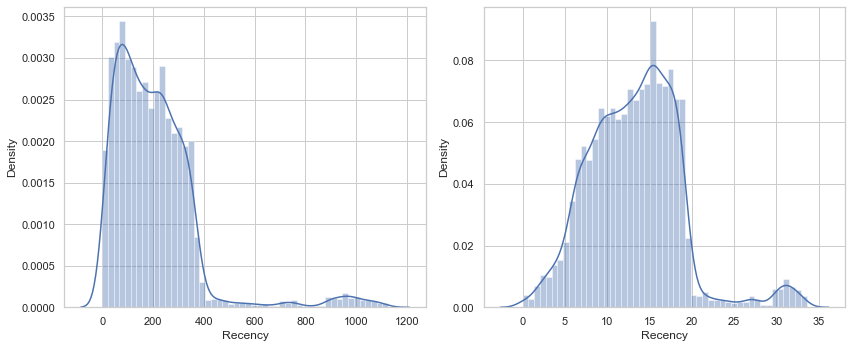

skewness 2.51
sqrt skewness 0.71


In [41]:
from scipy import stats

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))
_= sns.distplot(df_customer_model_NA['Recency'], ax = ax1 )
_= sns.distplot(np.sqrt(df_customer_model_NA['Recency']), ax = ax2 )
plt.tight_layout()
plt.show()

print('skewness', df_customer_model_NA['Recency'].skew().round(2))
print('sqrt skewness', np.sqrt(df_customer_model_NA['Recency']).skew().round(2))


sqrt skewness -\> min

Choose sqrt method sqrt

C:\Users\MINH THUAN\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


C:\Users\MINH THUAN\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MINH THUAN\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


C:\Users\MINH THUAN\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


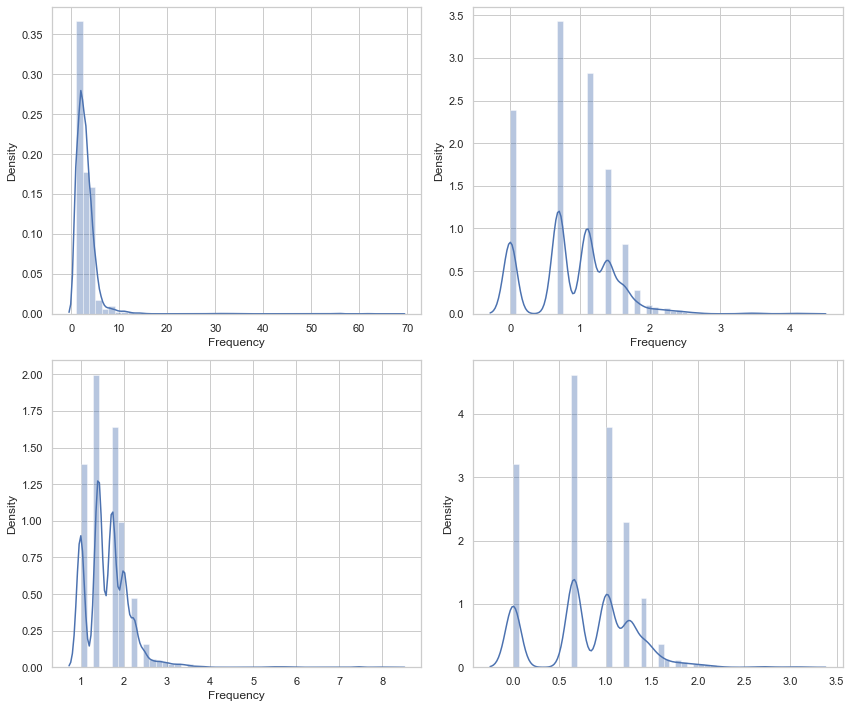

skewness 10.98
log skewness 0.33
sqrt skewness 3.1
boxcox skewness -0.01


In [42]:
g, ax = plt.subplots(2, 2, figsize = (12, 10))
_= sns.distplot(df_customer_model_NA['Frequency'], ax = ax[0, 0])
_= sns.distplot(np.log(df_customer_model_NA['Frequency']), ax = ax[0, 1])
_= sns.distplot(np.sqrt(df_customer_model_NA['Frequency']), ax = ax[1, 0])
_= sns.distplot(stats.boxcox(df_customer_model_NA['Frequency'])[0], ax = ax[1, 1])
plt.tight_layout()
plt.show()

print('skewness', df_customer_model_NA['Frequency'].skew().round(2))
print('log skewness', np.log(df_customer_model_NA['Frequency']).skew().round(2))
print('sqrt skewness', np.sqrt(df_customer_model_NA['Frequency']).skew().round(2))
print('boxcox skewness', pd.Series(stats.boxcox(df_customer_model_NA['Frequency'])[0]).skew().round(2))

boxcox  skewness -\> min

Choose boxcox method

C:\Users\MINH THUAN\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


C:\Users\MINH THUAN\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


C:\Users\MINH THUAN\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MINH THUAN\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


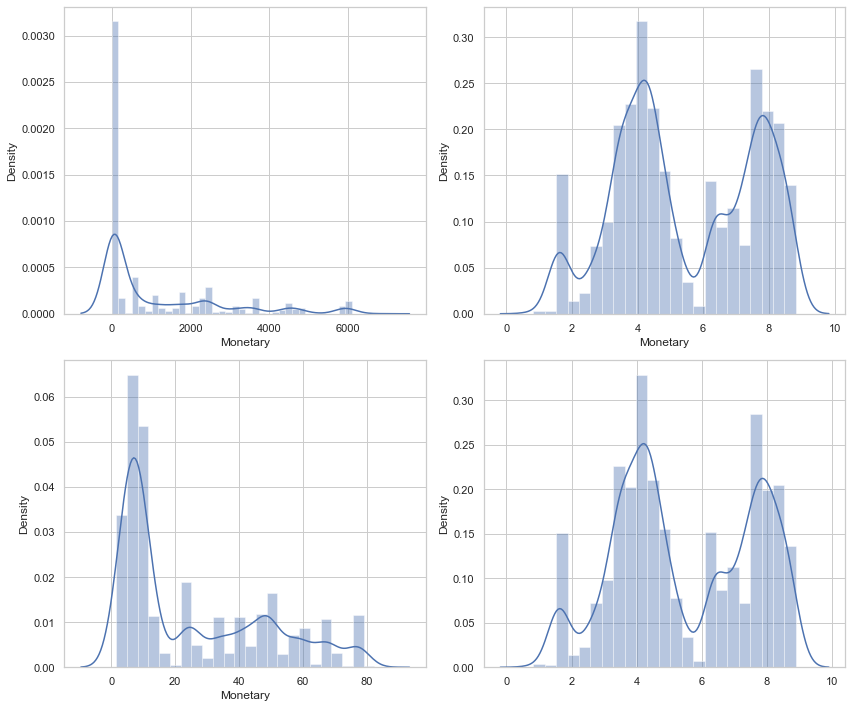

skewness 1.54
log skewness -0.01
sqrt skewness 0.85
boxcox skewness -0.0


In [43]:
g, ax = plt.subplots(2, 2,  figsize = (12, 10))
_= sns.distplot(df_customer_model_NA['Monetary'], ax = ax[0, 0])
_= sns.distplot(np.log(df_customer_model_NA['Monetary']), ax = ax[0, 1])
_= sns.distplot(np.sqrt(df_customer_model_NA['Monetary']), ax = ax[1, 0])
_= sns.distplot(stats.boxcox(df_customer_model_NA['Monetary'])[0], ax = ax[1, 1])
plt.tight_layout()
plt.show()

print('skewness', df_customer_model_NA['Monetary'].skew().round(2))
print('log skewness', np.log(df_customer_model_NA['Monetary']).skew().round(2))
print('sqrt skewness', np.sqrt(df_customer_model_NA['Monetary']).skew().round(2))
print('boxcox skewness', pd.Series(stats.boxcox(df_customer_model_NA['Monetary'])[0]).skew().round(2))

boxcox skewness -\> min

Choose boxcox method

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_customer_model_NA)
df_customer_scaler = scaler.transform(df_customer_model_NA)
df_customer_scaler

array([[-5.71526181e-01,  6.53546806e-01, -6.50001035e-01,
        -1.27187728e+00,  1.41478204e+00, -2.26659421e-01],
       [-1.13591524e+00,  6.53546806e-01, -6.29883636e-01,
        -1.27187728e+00,  1.41478204e+00, -2.26659421e-01],
       [ 3.95997912e-01,  9.80127731e-01, -6.14817119e-01,
        -1.27187728e+00,  1.41478204e+00, -2.26659421e-01],
       ...,
       [ 4.02997234e+00, -6.52776898e-01,  1.50139792e+00,
         7.86239378e-01, -7.06822654e-01, -2.26659421e-01],
       [-3.18127014e-01,  3.84953942e-04, -6.60945638e-01,
         7.86239378e-01, -7.06822654e-01, -2.26659421e-01],
       [ 3.94358626e+00, -6.52776898e-01,  1.50139792e+00,
         7.86239378e-01, -7.06822654e-01, -2.26659421e-01]])

In [45]:
pd.reset_option('display.float_format')
df_customer_scaler = pd.DataFrame(df_customer_scaler)
df_customer_scaler.head()

,0,1,2,3,4,5
0,-0.571526,0.653547,-0.650001,-1.271877,1.414782,-0.226659
1,-1.135915,0.653547,-0.629884,-1.271877,1.414782,-0.226659
2,0.395998,0.980128,-0.614817,-1.271877,1.414782,-0.226659
3,0.983423,-0.326196,-0.588652,0.786239,-0.706823,-0.226659
4,0.856724,0.000385,0.734851,0.786239,-0.706823,-0.226659


C. KNN clustering:

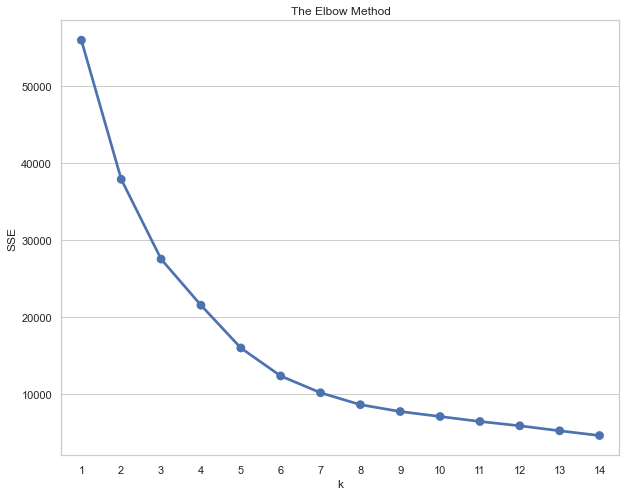

In [46]:
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 15):
    kmeans = KMeans( n_clusters = k, random_state = 1)
    kmeans.fit(df_customer_scaler)
    sse[k] = kmeans.inertia_

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
_= sns.pointplot(x = list(sse.keys()), y = list(sse.values()))
plt.show()

In [47]:
from sklearn.metrics import silhouette_score
silhouette_coefficients = []

for k in range(2, 15):
 kmeans = KMeans(n_clusters=k, random_state = 1)
 kmeans.fit(df_customer_scaler)
 score = silhouette_score(df_customer_scaler, kmeans.labels_)
 silhouette_coefficients.append(score)

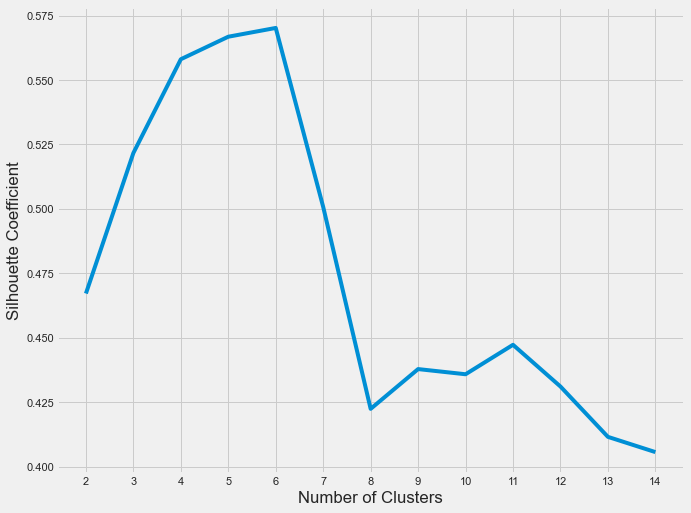

In [48]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 15), silhouette_coefficients)
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Choose k = 5

In [49]:
model = KMeans( n_clusters = 5, random_state = 1)
model.fit(df_customer_scaler)

KMeans(n_clusters=5, random_state=1)

In [50]:
df_customer_model_NA['Cluster'] = model.labels_ + 1
df_customer_model_NA.head()

,Recency,Frequency,Monetary,low income,medium income,high income,Cluster
0,105,5,81.26,0,1,0,3
1,7,5,113.96,0,1,0,3
2,273,6,138.45,0,1,0,3
3,375,2,180.98,1,0,0,2
4,353,3,2332.28,1,0,0,2


In [51]:
df_customer_model_NA.groupby('Cluster').agg(
    {
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': 'mean',
        'high income': 'mean',
        'medium income': 'mean',
        'low income': 'mean'
    }
).round(2)

,Recency,Frequency,Monetary,high income,medium income,low income
Cluster,,,,,,
1,882.51,1.00,3028.88,0.0,0.04,0.96
2,180.93,2.81,812.48,0.0,0.00,1.00
3,173.00,3.10,1410.40,0.0,1.00,0.00
4,188.34,3.07,1725.42,1.0,0.00,0.00
5,17.41,42.32,976.15,0.0,0.38,0.62


4 customer groups:

Cluster 1: high recency, low frequency, high spending, low, medium income, customer churn.

Cluster 2: Medium recency, low frequency, low spending, low income. 

Cluster 3+4: Medium recency, low frequency, medium spending, medium, high income.

Cluster 5: Low recency, high frequency, low spending, low, medium income.

B. <span style="font-size: 12px; white-space: pre-wrap;">Europe:</span>

a. Skewness:

In [52]:
df_customer_feature_EU = df_customer_feature.loc[df_customer_feature['Continent'] == 'Europe']
df_customer_model_EU = df_customer_feature_EU[['Recency', 'Frequency', 'Monetary', 'low income', 'medium income', 'high income']].reset_index(drop = True)
df_customer_model_EU.head()


,Recency,Frequency,Monetary,low income,medium income,high income
0,64,5,8246.3900,0,0,1
1,273,9,7542.7700,0,0,1
2,245,11,7511.5500,0,0,1
3,260,12,7577.2400,0,0,1
4,91,24,11466.8982,0,1,0


C:\Users\MINH THUAN\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


C:\Users\MINH THUAN\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


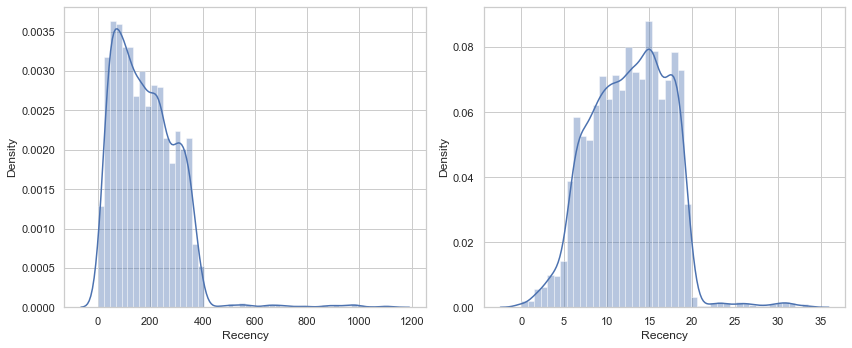

skewness 1.72
sqrt skewness 0.16


In [53]:
from scipy import stats
sns.set(style="whitegrid")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))
_= sns.distplot(df_customer_model_EU['Recency'], ax = ax1 )
_= sns.distplot(np.sqrt(df_customer_model_EU['Recency']), ax = ax2 )
plt.tight_layout()
plt.show()

print('skewness', df_customer_model_EU['Recency'].skew().round(2))
print('sqrt skewness', np.sqrt(df_customer_model_EU['Recency']).skew().round(2))


<span style="font-size: 10.5pt; font-family: &quot;Segoe UI&quot;, sans-serif;">sqrt skewness -&gt; min</span>

<span style="font-size: 10.5pt; font-family: &quot;Segoe UI&quot;, sans-serif;">Choose sqrt method sqrt</span>

C:\Users\MINH THUAN\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


C:\Users\MINH THUAN\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MINH THUAN\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


C:\Users\MINH THUAN\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


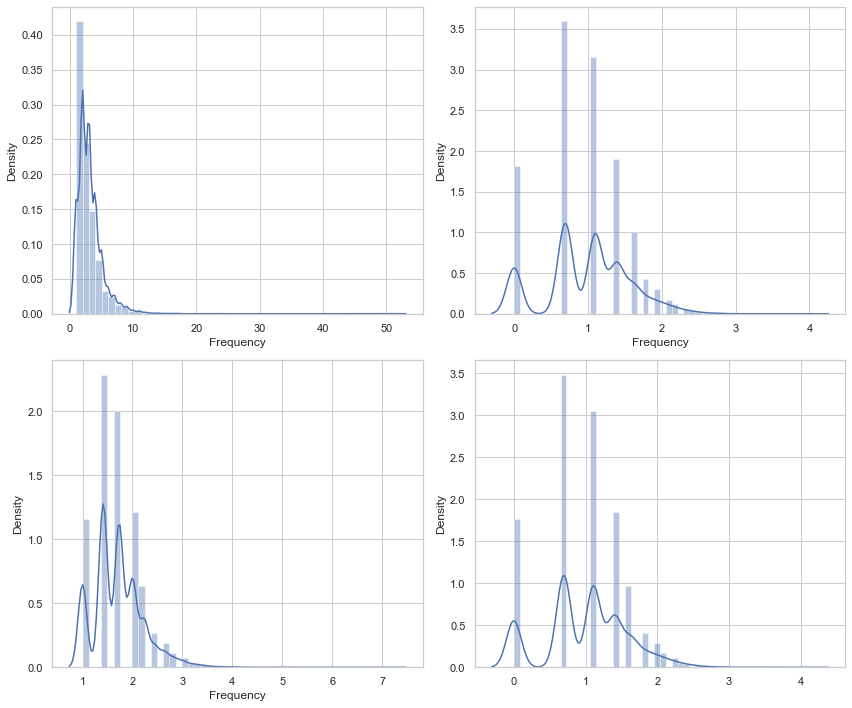

skewness 4.23
log skewness -0.03
sqrt skewness 1.03
boxcox skewness -0.0


In [54]:
g, ax = plt.subplots(2, 2, figsize = (12, 10))
_= sns.distplot(df_customer_model_EU['Frequency'], ax = ax[0, 0])
_= sns.distplot(np.log(df_customer_model_EU['Frequency']), ax = ax[0, 1])
_= sns.distplot(np.sqrt(df_customer_model_EU['Frequency']), ax = ax[1, 0])
_= sns.distplot(stats.boxcox(df_customer_model_EU['Frequency'])[0], ax = ax[1, 1])
plt.tight_layout()
plt.show()

print('skewness', df_customer_model_EU['Frequency'].skew().round(2))
print('log skewness', np.log(df_customer_model_EU['Frequency']).skew().round(2))
print('sqrt skewness', np.sqrt(df_customer_model_EU['Frequency']).skew().round(2))
print('boxcox skewness', pd.Series(stats.boxcox(df_customer_model_EU['Frequency'])[0]).skew().round(2))


<span style="font-size: 10.5pt; font-family: &quot;Segoe UI&quot;, sans-serif;">boxcox&nbsp; skewness -&gt; min</span>

<span style="font-size: 10.5pt; font-family: &quot;Segoe UI&quot;, sans-serif;">Choose boxcox method</span>

C:\Users\MINH THUAN\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MINH THUAN\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


C:\Users\MINH THUAN\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


C:\Users\MINH THUAN\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


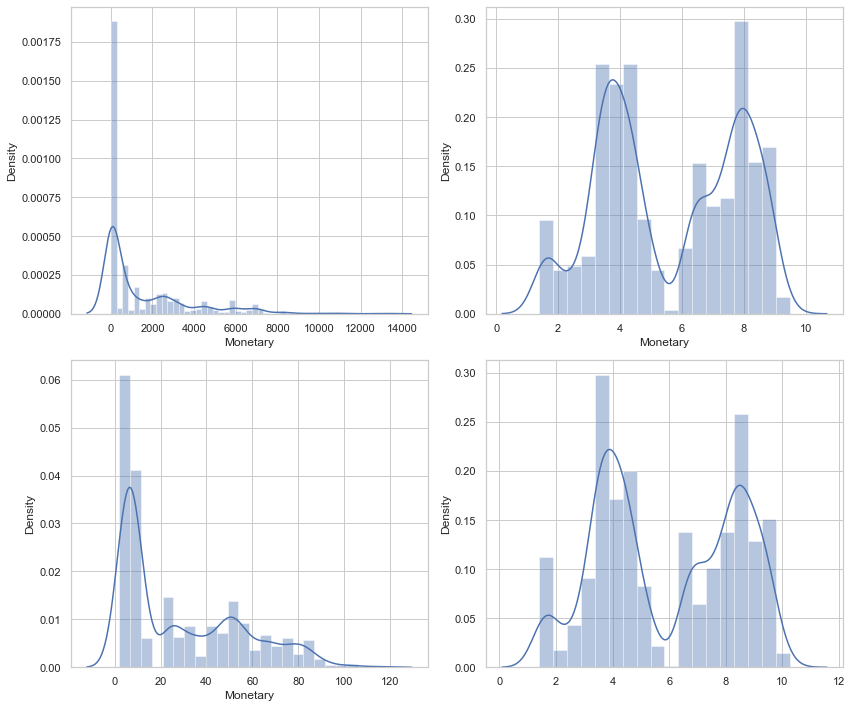

skewness 1.75
log skewness -0.05
sqrt skewness 0.83
boxcox skewness -0.02


In [55]:
g, ax = plt.subplots(2, 2,  figsize = (12, 10))
_= sns.distplot(df_customer_model_EU['Monetary'], ax = ax[0, 0])
_= sns.distplot(np.log(df_customer_model_EU['Monetary']), ax = ax[0, 1])
_= sns.distplot(np.sqrt(df_customer_model_EU['Monetary']), ax = ax[1, 0])
_= sns.distplot(stats.boxcox(df_customer_model_EU['Monetary'])[0], ax = ax[1, 1])
plt.tight_layout()
plt.show()

print('skewness', df_customer_model_EU['Monetary'].skew().round(2))
print('log skewness', np.log(df_customer_model_EU['Monetary']).skew().round(2))
print('sqrt skewness', np.sqrt(df_customer_model_EU['Monetary']).skew().round(2))
print('boxcox skewness', pd.Series(stats.boxcox(df_customer_model_EU['Monetary'])[0]).skew().round(2))


<span style="font-size: 10.5pt; font-family: &quot;Segoe UI&quot;, sans-serif;">boxcox skewness -&gt; min</span>

<span style="font-size: 10.5pt; font-family: &quot;Segoe UI&quot;, sans-serif;">Choose boxcox method</span>

<span style="color: rgba(0, 0, 0, 0.87); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;; background-color: rgb(255, 255, 255);">b. Data Standardization:</span>

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_customer_model_EU)
df_customer_scaler = scaler.transform(df_customer_model_EU)
df_customer_scaler

array([[-0.96411415,  0.89872939,  3.12193147, -1.94819264, -0.35565251,
         3.06433541],
       [ 0.74635749,  2.86952161,  2.79625044, -1.94819264, -0.35565251,
         3.06433541],
       [ 0.5172034 ,  3.85491772,  2.78179979, -1.94819264, -0.35565251,
         3.06433541],
       ...,
       [ 5.86958836, -1.07206283,  0.86713116,  0.51329626, -0.35565251,
        -0.32633503],
       [ 2.57959026, -1.07206283,  0.25342232,  0.51329626, -0.35565251,
        -0.32633503],
       [ 2.65324694, -1.07206283,  0.25342232,  0.51329626, -0.35565251,
        -0.32633503]])

In [57]:
pd.reset_option('display.float_format')
df_customer_scaler = pd.DataFrame(df_customer_scaler)
df_customer_scaler.head()


,0,1,2,3,4,5
0,-0.964114,0.898729,3.121931,-1.948193,-0.355653,3.064335
1,0.746357,2.869522,2.796250,-1.948193,-0.355653,3.064335
2,0.517203,3.854918,2.781800,-1.948193,-0.355653,3.064335
3,0.639965,4.347616,2.812205,-1.948193,-0.355653,3.064335
4,-0.743144,10.259992,4.612592,-1.948193,2.811733,-0.326335


<span style="color: rgba(0, 0, 0, 0.87); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;; background-color: rgb(255, 255, 255);">c. KNN clustering:</span>

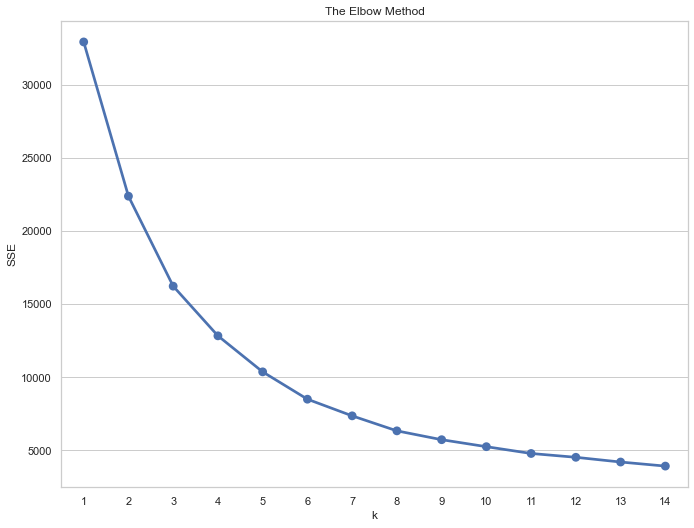

In [58]:
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 15):
    kmeans = KMeans( n_clusters = k, random_state = 1)
    kmeans.fit(df_customer_scaler)
    sse[k] = kmeans.inertia_

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
_= sns.pointplot(x = list(sse.keys()), y = list(sse.values()))
plt.show()


In [59]:
from sklearn.metrics import silhouette_score
silhouette_coefficients = []

for k in range(2, 15):
 kmeans = KMeans(n_clusters=k, random_state = 1)
 kmeans.fit(df_customer_scaler)
 score = silhouette_score(df_customer_scaler, kmeans.labels_)
 silhouette_coefficients.append(score)


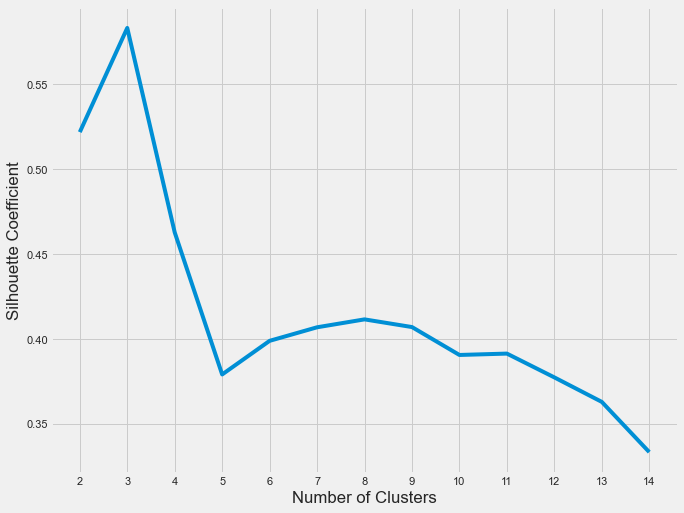

In [60]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 15), silhouette_coefficients)
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()


Choose k = 3

In [61]:
model = KMeans( n_clusters = 3, random_state = 1)
model.fit(df_customer_scaler)


KMeans(n_clusters=3, random_state=1)

In [62]:
df_customer_model_EU['Cluster'] = model.labels_ + 1
df_customer_model_EU.head()


,Recency,Frequency,Monetary,low income,medium income,high income,Cluster
0,64,5,8246.3900,0,0,1,2
1,273,9,7542.7700,0,0,1,2
2,245,11,7511.5500,0,0,1,2
3,260,12,7577.2400,0,0,1,2
4,91,24,11466.8982,0,1,0,3


In [63]:
df_customer_model_EU.groupby('Cluster').agg(
    {
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': 'mean',
        'high income': 'mean',
        'medium income': 'mean',
        'low income': 'mean'
    }
).round(2)


,Recency,Frequency,Monetary,high income,medium income,low income
Cluster,,,,,,
1,186.42,3.02,1382.92,0.0,0.0,1.0
2,165.47,4.09,2218.59,1.0,0.0,0.0
3,163.32,3.51,1722.10,0.0,1.0,0.0


2 customer groups:<span style="font-size: 12px;"><br></span>

<span style="font-size: 12px;">Cluster&nbsp;&nbsp;</span> 1 + 3: Medium spending, medium, low income.

<span style="font-size: 12px;">Cluster&nbsp;</span> 2: High spending, high income.

C. <span style="font-size: 12px; white-space: pre-wrap;">Pacific:</span>

a. Skewness:

In [64]:
df_customer_feature_PA = df_customer_feature.loc[df_customer_feature['Continent'] == 'Pacific']
df_customer_model_PA = df_customer_feature_PA[['Recency', 'Frequency', 'Monetary', 'low income', 'medium income', 'high income']].reset_index(drop = True)
df_customer_model_PA.head()


,Recency,Frequency,Monetary,low income,medium income,high income
0,270,7,5929.00,0,1,0
1,49,11,6383.88,1,0,0
2,339,4,8114.04,1,0,0
3,263,9,8139.29,0,1,0
4,272,6,8196.01,0,1,0


C:\Users\MINH THUAN\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MINH THUAN\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


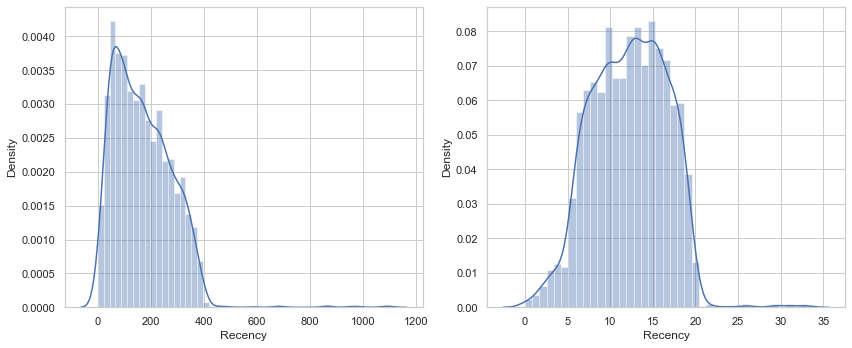

skewness 1.37
sqrt skewness 0.01


In [65]:
from scipy import stats
sns.set(style="whitegrid")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))
_= sns.distplot(df_customer_model_PA['Recency'], ax = ax1 )
_= sns.distplot(np.sqrt(df_customer_model_PA['Recency']), ax = ax2 )
plt.tight_layout()
plt.show()

print('skewness', df_customer_model_PA['Recency'].skew().round(2))
print('sqrt skewness', np.sqrt(df_customer_model_PA['Recency']).skew().round(2))


<span style="font-size: 10.5pt; font-family: &quot;Segoe UI&quot;, sans-serif;">sqrt skewness -&gt; min</span>

<span style="font-size: 10.5pt; font-family: &quot;Segoe UI&quot;, sans-serif;">Choose sqrt method sqrt</span>

C:\Users\MINH THUAN\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MINH THUAN\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


C:\Users\MINH THUAN\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MINH THUAN\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


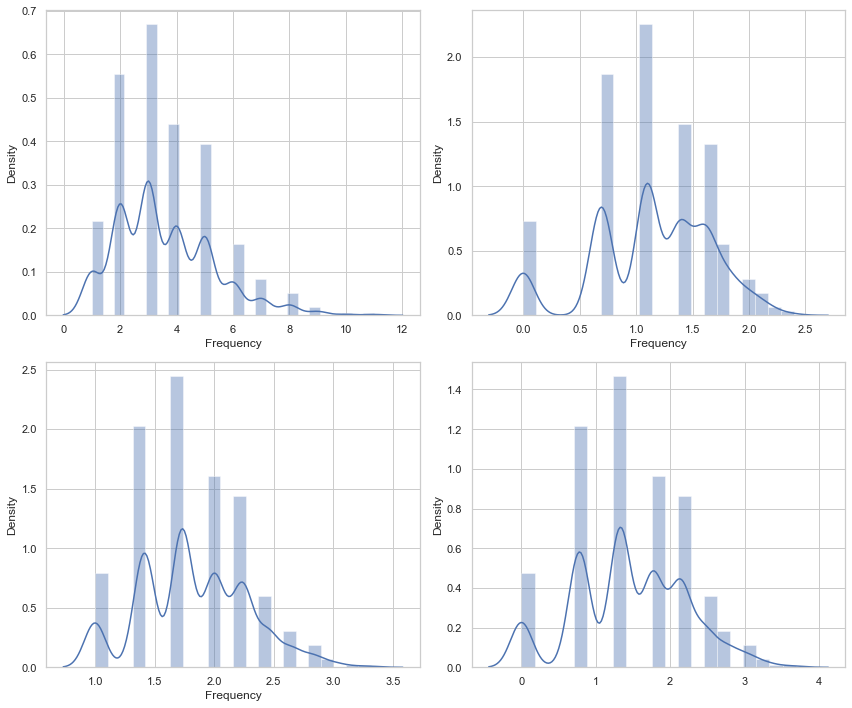

skewness 0.84
log skewness -0.46
sqrt skewness 0.19
boxcox skewness -0.02


In [66]:
g, ax = plt.subplots(2, 2, figsize = (12, 10))
_= sns.distplot(df_customer_model_PA['Frequency'], ax = ax[0, 0])
_= sns.distplot(np.log(df_customer_model_PA['Frequency']), ax = ax[0, 1])
_= sns.distplot(np.sqrt(df_customer_model_PA['Frequency']), ax = ax[1, 0])
_= sns.distplot(stats.boxcox(df_customer_model_PA['Frequency'])[0], ax = ax[1, 1])
plt.tight_layout()
plt.show()

print('skewness', df_customer_model_PA['Frequency'].skew().round(2))
print('log skewness', np.log(df_customer_model_PA['Frequency']).skew().round(2))
print('sqrt skewness', np.sqrt(df_customer_model_PA['Frequency']).skew().round(2))
print('boxcox skewness', pd.Series(stats.boxcox(df_customer_model_PA['Frequency'])[0]).skew().round(2))


<span style="font-size: 10.5pt; font-family: &quot;Segoe UI&quot;, sans-serif;">boxcox&nbsp; skewness -&gt; min</span>

<span style="font-size: 10.5pt; font-family: &quot;Segoe UI&quot;, sans-serif;">Choose boxcox method</span>

C:\Users\MINH THUAN\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MINH THUAN\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


C:\Users\MINH THUAN\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MINH THUAN\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


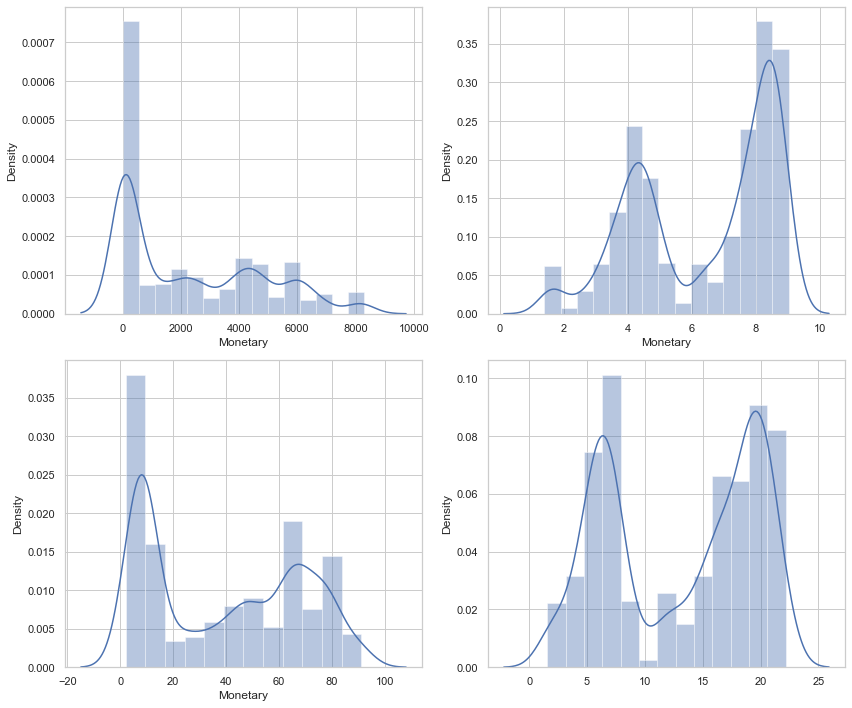

skewness 0.67
log skewness -0.48
sqrt skewness 0.16
boxcox skewness -0.2


In [67]:
g, ax = plt.subplots(2, 2,  figsize = (12, 10))
_= sns.distplot(df_customer_model_PA['Monetary'], ax = ax[0, 0])
_= sns.distplot(np.log(df_customer_model_PA['Monetary']), ax = ax[0, 1])
_= sns.distplot(np.sqrt(df_customer_model_PA['Monetary']), ax = ax[1, 0])
_= sns.distplot(stats.boxcox(df_customer_model_PA['Monetary'])[0], ax = ax[1, 1])
plt.tight_layout()
plt.show()

print('skewness', df_customer_model_PA['Monetary'].skew().round(2))
print('log skewness', np.log(df_customer_model_PA['Monetary']).skew().round(2))
print('sqrt skewness', np.sqrt(df_customer_model_PA['Monetary']).skew().round(2))
print('boxcox skewness', pd.Series(stats.boxcox(df_customer_model_PA['Monetary'])[0]).skew().round(2))


boxcox skewness -> min
Choose boxcox method


<span style="color: rgba(0, 0, 0, 0.87); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;; background-color: rgb(255, 255, 255);">b. Data Standardization:</span>

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_customer_model_PA)
df_customer_scaler = scaler.transform(df_customer_model_PA)
df_customer_scaler


array([[ 0.92347169,  1.96517106,  1.45224492, -0.89028293,  0.97712251,
        -0.22028124],
       [-1.08913891,  4.26315594,  1.63714335,  1.12323843, -1.02341313,
        -0.22028124],
       [ 1.55184332,  0.24168241,  2.34041422,  1.12323843, -1.02341313,
        -0.22028124],
       ...,
       [-0.52451512, -0.90731003, -0.65235665,  1.12323843, -1.02341313,
        -0.22028124],
       [-0.57915613, -0.33281381, -0.65032833,  1.12323843, -1.02341313,
        -0.22028124],
       [-0.62469031,  0.24168241, -0.63610569,  1.12323843, -1.02341313,
        -0.22028124]])

In [69]:
pd.reset_option('display.float_format')
df_customer_scaler = pd.DataFrame(df_customer_scaler)
df_customer_scaler.head()


,0,1,2,3,4,5
0,0.923472,1.965171,1.452245,-0.890283,0.977123,-0.220281
1,-1.089139,4.263156,1.637143,1.123238,-1.023413,-0.220281
2,1.551843,0.241682,2.340414,1.123238,-1.023413,-0.220281
3,0.859724,3.114164,2.350678,-0.890283,0.977123,-0.220281
4,0.941685,1.390675,2.373733,-0.890283,0.977123,-0.220281


<span style="color: rgba(0, 0, 0, 0.87); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, Helvetica, Arial, sans-serif, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;; background-color: rgb(255, 255, 255);">c. KNN clustering:</span>

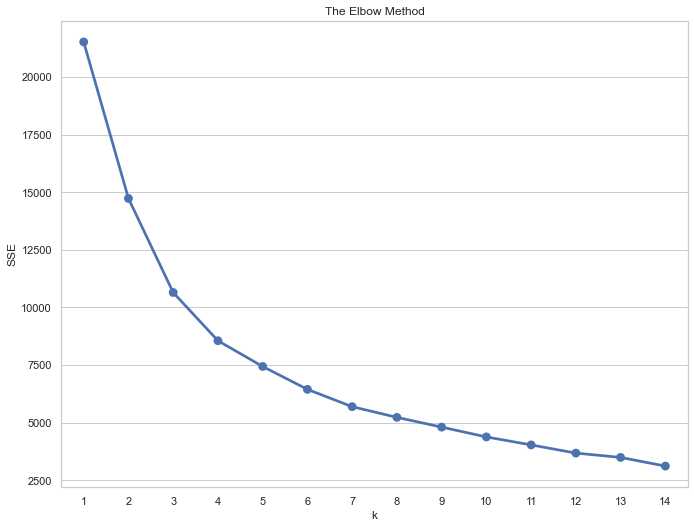

In [70]:
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 15):
    kmeans = KMeans( n_clusters = k, random_state = 1)
    kmeans.fit(df_customer_scaler)
    sse[k] = kmeans.inertia_

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
_= sns.pointplot(x = list(sse.keys()), y = list(sse.values()))
plt.show()



In [71]:
from sklearn.metrics import silhouette_score
silhouette_coefficients = []

for k in range(2, 15):
 kmeans = KMeans(n_clusters=k, random_state = 1)
 kmeans.fit(df_customer_scaler)
 score = silhouette_score(df_customer_scaler, kmeans.labels_)
 silhouette_coefficients.append(score)



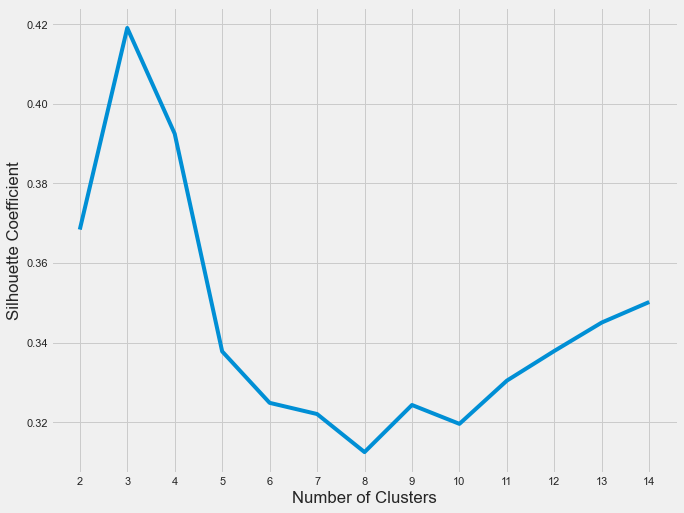

In [72]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 15), silhouette_coefficients)
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()


Choose k = 4

In [73]:
model = KMeans( n_clusters = 4, random_state = 1)
model.fit(df_customer_scaler)


KMeans(n_clusters=4, random_state=1)

In [74]:
df_customer_model_PA['Cluster'] = model.labels_ + 1
df_customer_model_PA.head()


,Recency,Frequency,Monetary,low income,medium income,high income,Cluster
0,270,7,5929.00,0,1,0,1
1,49,11,6383.88,1,0,0,1
2,339,4,8114.04,1,0,0,2
3,263,9,8139.29,0,1,0,1
4,272,6,8196.01,0,1,0,1


In [75]:
df_customer_model_PA.groupby('Cluster').agg(
    {
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': 'mean',
        'high income': 'mean',
        'medium income': 'mean',
        'low income': 'mean'
    }
).round(2)


,Recency,Frequency,Monetary,high income,medium income,low income
Cluster,,,,,,
1,169.95,4.89,5659.74,0.0,0.97,0.03
2,163.96,3.37,1911.57,0.0,0.00,1.00
3,174.59,2.99,810.91,0.0,1.00,0.00
4,164.85,4.16,3327.81,1.0,0.00,0.00


4 customer groups:<span style="font-size: 12px;"><br></span>

<span style="font-size: 12px;">Cluster&nbsp;</span> 1: high spending, low, medium income.

<span style="font-size: 12px;">Cluster&nbsp;</span> 2:  medium spending, low income. 

<span style="font-size: 12px;">Cluster&nbsp;</span> 3: low spending, medium income.

<span style="font-size: 12px;">Cluster&nbsp;</span> 4: high spending, high income.

### Setting:

Recency:

- 1 - 120: Low Recency
    
- 120 - 360: Medium Recency
    
- 360+: High Recency
    

Frequency:

- 1 - 5: Low frequency
    
- 5 - 10: Medium frequency
    
- over 10: High frequency
    

Monetary:

- 0 - 1000: Low spending
    
- 1000 - 2000: Medium spending
    
- 2000: High spending